In [66]:
from __future__ import print_function
import numpy as np # Biblioteca de funciones matematicas de alto nivel
np.random.seed(1337)  # for reproducibility
import tensorflow as tf
import keras  
import pandas as pd

In [67]:
dataset = pd.read_csv('Train.csv', encoding = "ISO-8859-1") # lectura de datos
dataset1 = pd.read_csv('Test.csv', encoding = "ISO-8859-1") # lectura de datos


In [68]:
dataset.replace([np.inf, -np.inf], -1, inplace=True) 
dataset.replace([np.nan, -np.nan], -1, inplace=True)

dataset1.replace([np.inf, -np.inf], -1, inplace=True) 
dataset1.replace([np.nan, -np.nan], -1, inplace=True)

In [69]:
#Eliminamos los datos mal introducidos
#Eliminamos los datos mal introducidos
dataset = dataset.drop(dataset[dataset['Dst Port']=='Dst Port'].index)
dataset1 = dataset1.drop(dataset1[dataset1['Dst Port']=='Dst Port'].index)

dataset = dataset[dataset['Flow IAT Min'] >= 0]
dataset1 = dataset1[dataset1['Flow IAT Min'] >= 0]
#Eliminamos las columnas innecesarias

dataset = dataset.drop(['Flow ID', 'Src IP', 'Src Port', 'Dst IP','Unnamed: 0','Dst Port','Fwd Seg Size Min',
                       'Idle Min','Idle Mean','Idle Std','Idle Max'], axis=1)
dataset1 = dataset1.drop(['Flow ID', 'Src IP', 'Src Port', 'Dst IP','Unnamed: 0','Dst Port','Fwd Seg Size Min',
                          'Idle Min','Idle Mean','Idle Std','Idle Max'], axis=1)
#Quitamos direcciones IP dest y src para no introducir sesgos, lo mismo con los puertos
#Quitar el puerto de destino es una modificación con respecto al trabajo original
#Eliminamos la columna de timestamp para no tener sesgo
dataset1 = dataset1.drop(['Timestamp'], axis=1)
dataset = dataset.drop(['Timestamp'], axis=1)



        

#Eliminamos la columna 
dataset

#Eliminamos la columna 

,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,...,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Active Mean,Active Std,Active Max,Active Min,Label
0,6,3025021,11,15,336.0,188.0,79.0,0.0,30.545455,38.624768,...,0,7,64240,181,6,0,0,0,0,FTP-BruteForce
1,6,468,2,1,79.0,0.0,79.0,0.0,39.500000,55.861436,...,0,0,502,0,0,0,0,0,0,FTP-BruteForce
2,6,3054906,13,15,338.0,188.0,79.0,0.0,26.000000,36.398260,...,0,6,64240,181,6,0,0,0,0,FTP-BruteForce
3,6,3046116,11,15,341.0,188.0,79.0,0.0,31.000000,38.348403,...,0,7,64240,181,6,0,0,0,0,FTP-BruteForce
4,6,3045413,13,15,351.0,188.0,86.0,0.0,27.000000,37.678464,...,0,6,64240,181,6,0,0,0,0,FTP-BruteForce
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430151,17,9264,1,1,47.0,63.0,47.0,47.0,47.000000,0.000000,...,0,31,0,0,0,0,0,0,0,Benign
430152,0,91444297,51,0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,Benign
430153,17,101164777,6,6,1332.0,1032.0,222.0,222.0,222.000000,0.000000,...,0,86,0,0,5,0,0,0,0,Benign
430154,17,101009912,6,6,1332.0,1032.0,222.0,222.0,222.000000,0.000000,...,0,86,0,0,5,0,0,0,0,Benign


In [70]:
n=0
for column in dataset:
    column
    if column != 'Label':
        dataset[column] = dataset[column].astype(float)
        
n=0
for column in dataset1:
    column
    if column != 'Label':
        dataset1[column] = dataset1[column].astype(float)


In [71]:
#dataset.loc[(dataset.Label != 'Benign'),'Label']='Evil'
#dataset1.loc[(dataset1.Label != 'Benign'),'Label']='Evil'
# Solo se utiliza para detectar malo o bueno




#dataset = dataset.drop(dataset[dataset['Label'] == 'Evil'].sample(frac=.5).index)
#dataset1 = dataset1.drop(dataset1[dataset1['Label'] == 'Evil'].sample(frac=.5).index)



In [72]:
Labels = dataset['Label'].unique()
Y_train = dataset["Label"]
Y_test =  dataset1["Label"]

In [78]:
from sklearn.feature_selection import VarianceThreshold
import seaborn as sns
import matplotlib.pyplot as plt

datasetaux=dataset1
datasetaux["newLabel"]=dataset1['Flow IAT Min']*0

X_train=dataset.iloc[:, 0:72] #Luego obtenemos las características del flujo
X_test=dataset1.iloc[:, 0:72]

aux=X_train.var()

for col in X_train.columns:
    if X_train[col].var() == 0:
        print(col)
        X_train=X_train.drop(col, axis =1)
        X_test=X_test.drop(col, axis =1)
        datasetaux=datasetaux.drop(col, axis =1)
       
        #Aqui iria un drop
#0-Bening
#1-DoS attacks-GoldenEye
#2-DoS attacks-Hulk
#3-'DoS attacks-SlowHTTPTest
#4-'DoS attacks-Slowloris
#5'FTP-BruteForce,
#6'SSH-Bruteforce

        
datasetaux['newLabel'][datasetaux['Label'] == 'Benign'] = 0
datasetaux['newLabel'][datasetaux['Label'] == 'DoS attacks-GoldenEye'] = 1
datasetaux['newLabel'][datasetaux['Label'] == 'DoS attacks-Hulk'] = 2
datasetaux['newLabel'][datasetaux['Label'] == 'DoS attacks-SlowHTTPTest'] = 3
datasetaux['newLabel'][datasetaux['Label'] == 'DoS attacks-Slowloris'] = 4
datasetaux['newLabel'][datasetaux['Label'] == 'FTP-BruteForce'] = 5
datasetaux['newLabel'][datasetaux['Label'] == 'SSH-Bruteforce'] = 6

datasetaux=datasetaux.drop(['Label'],axis=1)

datasetaux.to_csv("TestV3.dat", sep=',', encoding='utf-8')
       

features = list(X_train.columns)
datasetaux 

Bwd PSH Flags
Fwd URG Flags
Bwd URG Flags
URG Flag Cnt
CWE Flag Count
ECE Flag Cnt
Fwd Byts/b Avg
Fwd Pkts/b Avg
Fwd Blk Rate Avg
Bwd Byts/b Avg
Subflow Bwd Pkts
Active Mean
Active Std
Active Max
Active Min


C:\Users\mates\AppData\Local\Temp\ipykernel_3236\2154889295.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasetaux['newLabel'][datasetaux['Label'] == 'Benign'] = 0
C:\Users\mates\AppData\Local\Temp\ipykernel_3236\2154889295.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasetaux['newLabel'][datasetaux['Label'] == 'DoS attacks-GoldenEye'] = 1
C:\Users\mates\AppData\Local\Temp\ipykernel_3236\2154889295.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,...,Bwd Seg Size Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,newLabel
0,6.0,497.0,2.0,0.0,22.0,0.0,22.0,0.0,11.00,15.556349,...,0.000000,0.0,0.0,1.0,11.0,0.0,181.0,0.0,0.0,5.0
1,6.0,312.0,2.0,0.0,79.0,0.0,79.0,0.0,39.50,55.861436,...,0.000000,0.0,0.0,1.0,39.0,0.0,502.0,0.0,0.0,5.0
2,6.0,591.0,2.0,0.0,22.0,0.0,22.0,0.0,11.00,15.556349,...,0.000000,0.0,0.0,1.0,11.0,0.0,181.0,0.0,0.0,5.0
3,6.0,778.0,2.0,0.0,22.0,0.0,22.0,0.0,11.00,15.556349,...,0.000000,0.0,0.0,1.0,11.0,0.0,181.0,0.0,0.0,5.0
4,6.0,1261.0,2.0,0.0,22.0,0.0,22.0,0.0,11.00,15.556349,...,0.000000,0.0,0.0,1.0,11.0,0.0,181.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101987,17.0,5969.0,8.0,0.0,2470.0,0.0,346.0,272.0,308.75,34.849677,...,0.000000,8.0,413804.0,1.0,308.0,0.0,0.0,0.0,7.0,0.0
101988,6.0,95543879.0,5.0,3.0,638.0,850.0,635.0,0.0,127.60,283.645553,...,283.333333,0.0,0.0,0.0,79.0,106.0,515.0,275.0,3.0,0.0
101989,0.0,110405676.0,16.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,...,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
101990,6.0,90528029.0,3.0,2.0,3.0,0.0,1.0,1.0,1.00,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,508.0,265.0,2.0,0.0


In [48]:
from sklearn.preprocessing import LabelEncoder
 
lb_make = LabelEncoder()
Y_train = lb_make.fit_transform(Y_train) #para pasar a numeros
Y_train

Labels = lb_make.inverse_transform(Y_train)
Labels = list(lb_make.classes_)
Labels

['Benign',
 'DoS attacks-GoldenEye',
 'DoS attacks-Hulk',
 'DoS attacks-SlowHTTPTest',
 'DoS attacks-Slowloris',
 'FTP-BruteForce',
 'SSH-Bruteforce']

In [50]:
from numpy import savetxt
lb_make = LabelEncoder()
Y_test = lb_make.fit_transform(Y_test)


Labels1 = lb_make.inverse_transform(Y_test)
Labels1 = list(lb_make.classes_)
Y_test

(101815,)


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

In [11]:
dataset["Label"].value_counts()

Evil      154193
Benign    120096
Name: Label, dtype: int64

In [12]:
dataset1["Label"].value_counts()

Evil      34793
Benign    32228
Name: Label, dtype: int64

In [13]:
import shap

from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline

In [14]:

from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline

#scaler = MinMaxScaler().fit(X_train) # Normalizamos los datos
#trainX = scaler.transform(X_train) # Asi se representan los datos

#testT = scaler.transform(X_test)
X_trainArr=X_train.to_numpy()

In [15]:
import time
inicio=time.time()

inicio = time.time()
model = make_pipeline(
    StandardScaler(),
    MLPClassifier(hidden_layer_sizes=(16,12),activation='relu', max_iter=500,random_state=0)
)

model.fit(X_trainArr,Y_train)

fin = time.time()
tiempo_neurona = fin-inicio
print(tiempo_neurona)

181.1179220676422


In [16]:
# evaluate the model Entrenamiento

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
X_testArr = X_test.to_numpy()
Y_pred=model.predict(X_trainArr)
LabelsArr = np.array(Labels)
Labels
LabelsArr
y_test1 = []
for i in range(0, Y_train.size):
        if Y_train[i] == 1:
            y_test1.append("Evil")
        else:
            y_test1.append("Benign")
y_pred1 = []
for i in range(0, Y_pred.size):
        if Y_pred[i] == 1:
            y_pred1.append("Evil")
        else:
            y_pred1.append("Benign")


In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test1, y_pred1, digits=8, zero_division= "warn"))

              precision    recall  f1-score   support

      Benign  0.99341325 0.99084899 0.99212946    120096
        Evil  0.99288687 0.99488304 0.99388395    154193

    accuracy                      0.99311675    274289
   macro avg  0.99315006 0.99286601 0.99300671    274289
weighted avg  0.99311734 0.99311675 0.99311576    274289



<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

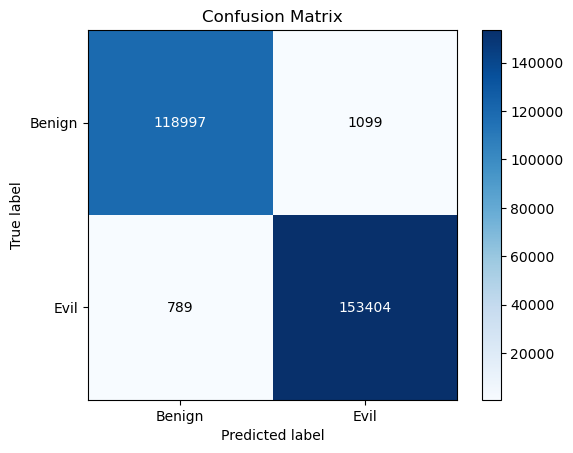

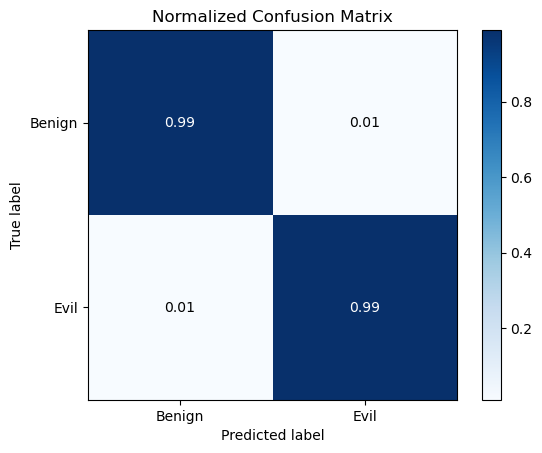

In [18]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_test1, y_pred1)
skplt.metrics.plot_confusion_matrix(y_test1, y_pred1, normalize= True)

In [19]:
# evaluate the model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
X_testArr = X_test.to_numpy()
Y_pred=model.predict(X_testArr)
LabelsArr = np.array(Labels)
Labels
LabelsArr
y_test1 = []
for i in range(0, Y_test.size):
        if Y_test[i] == 1:
            y_test1.append("Evil")
        else:
            y_test1.append("Benign")
y_pred1 = []
for i in range(0, Y_pred.size):
        if Y_pred[i] == 1:
            y_pred1.append("Evil")
        else:
            y_pred1.append("Benign")
            



In [20]:
from sklearn.metrics import classification_report

print(classification_report(y_test1, y_pred1, digits=8, zero_division= "warn"))



              precision    recall  f1-score   support

      Benign  0.98454221 0.97629391 0.98040071     32228
        Evil  0.97821065 0.98580174 0.98199153     34793

    accuracy                      0.98122976     67021
   macro avg  0.98137643 0.98104782 0.98119612     67021
weighted avg  0.98125527 0.98122976 0.98122656     67021



<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

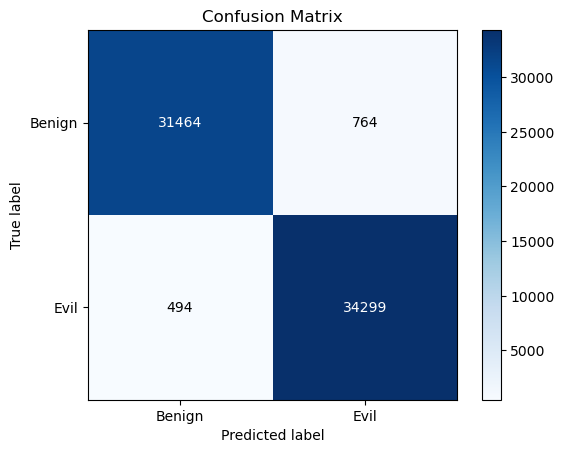

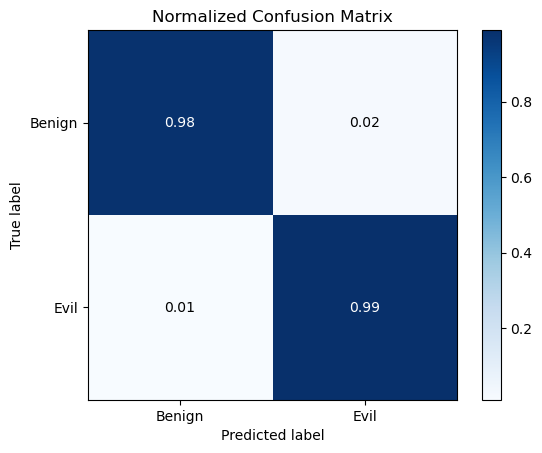

In [21]:

import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test1, y_pred1)
skplt.metrics.plot_confusion_matrix(y_test1, y_pred1, normalize= True)

In [22]:
size=200
data=shap.sample(X_trainArr, size)
explainer = shap.KernelExplainer(model.predict,data)
expected_value = explainer.expected_value
data1=shap.sample(X_testArr, size)
#shap_values = explainer.shap_values(data1,nsamples=size)

Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [23]:
#np.savetxt('ataqueV2.1.txt',shap_values)


shap_values = np.loadtxt('ataqueV2.1.txt')
print(shap_values.shape)

(200, 57)


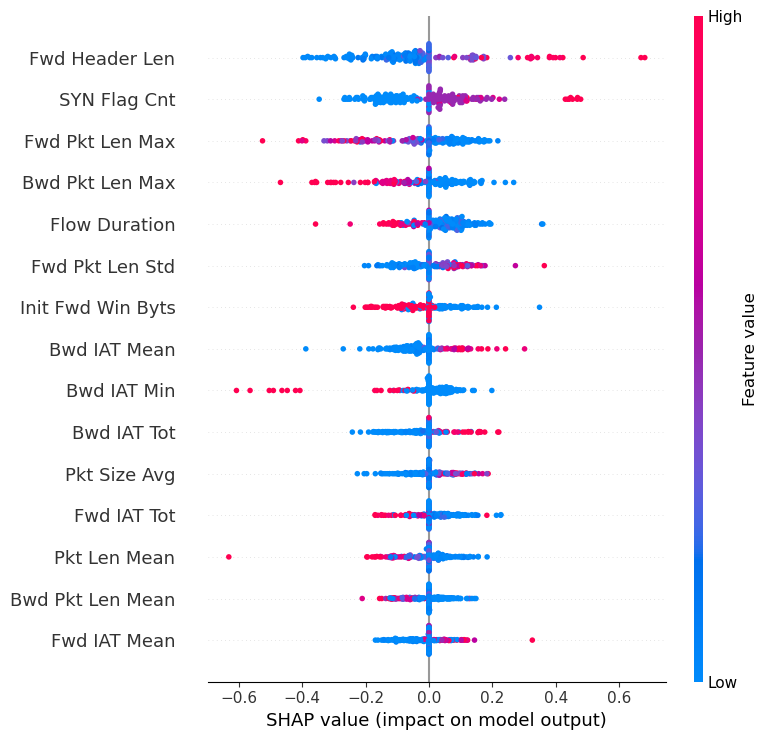

In [24]:
shap.summary_plot(shap_values,data1,feature_names=features,max_display=15)

count    2.742890e+05
mean     5.880981e+02
std      6.884858e+03
min      0.000000e+00
25%      6.400000e+01
50%      1.720000e+02
75%      3.280000e+02
max      1.510520e+06
Name: Fwd Header Len, dtype: float64
count    1.200960e+05
mean     8.429220e+02
std      1.037687e+04
min      0.000000e+00
25%      4.000000e+01
50%      9.200000e+01
75%      2.720000e+02
max      1.510520e+06
Name: Fwd Header Len, dtype: float64


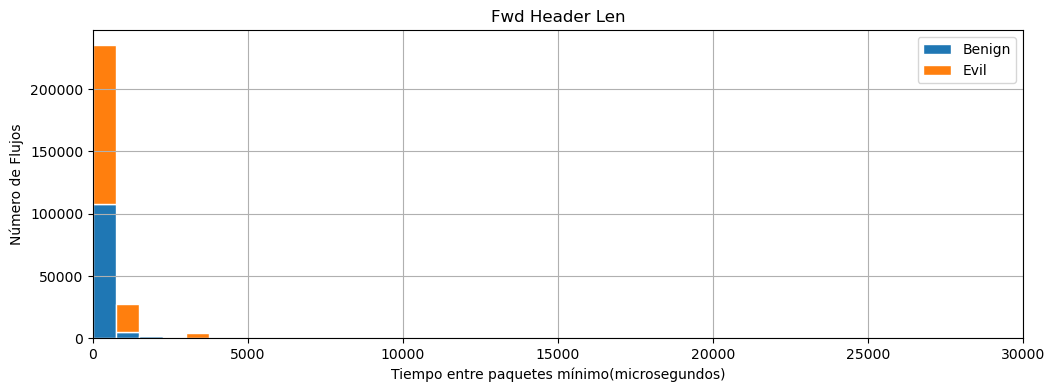

In [92]:
caracteris= 'Fwd Header Len'

lim=30000
pruebadf=dataset.loc[dataset[caracteris] < lim]
print(dataset[caracteris].describe())
bin = 40

plt.rcParams["figure.figsize"] = (12,4)

n, bins, patches = plt.hist(
    [pruebadf.loc[pruebadf['Label'] == 'Benign',caracteris],
     pruebadf.loc[pruebadf['Label'] == 'Evil',caracteris]],
    stacked=True,
    label=['Benign','Evil'],
    edgecolor='white',
    bins = bin,
    )


print(dataset.loc[dataset['Label'] == 'Benign',caracteris].describe())


plt.legend()
plt.grid()
plt.title(caracteris)
plt.ylabel("Número de Flujos")
plt.xlabel("Tiempo entre paquetes mínimo(microsegundos)")
plt.xlim([0,lim])
plt.savefig("Número de banderas.pdf")

(0.0, 400.0)

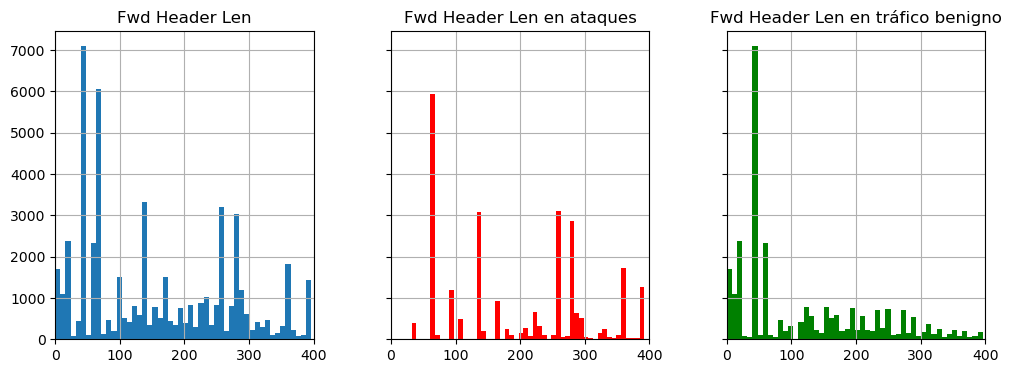

In [26]:
#Histograma del FWdSigSezSize

caracteris= 'Fwd Header Len'
fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True,figsize=(12,4))
lim=400

pruebadf=dataset1.loc[dataset1[caracteris] < lim]
evildf=pruebadf.loc[pruebadf['Label'] == "Evil"]
Benigndf=pruebadf.loc[pruebadf['Label'] == "Benign"]

bin = 50


pruebadf.hist(column=caracteris, ax = ax[0],bins = bin)
evildf.hist(column=caracteris, ax = ax[1],color="red",bins = bin)
Benigndf.hist(column=caracteris, ax = ax[2],color="green",bins = bin)


ax[0].set_title(caracteris )
ax[1].set_title( caracteris+" en ataques")
ax[2].set_title(caracteris+ " en tráfico benigno")

ax[0].set_xlim([0, lim])

ax[1].set_xlim([0, lim])

ax[2].set_xlim([0, lim])

In [27]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values,data1,feature_names=features, out_names=Labels)



In [28]:
y_preddata=model.predict(data1)


In [29]:
num=104;

shap.force_plot(explainer.expected_value, shap_values[num,:]  ,data1[num,:],feature_names=features, figsize=[15,28])
#1 maligno #0 benigno

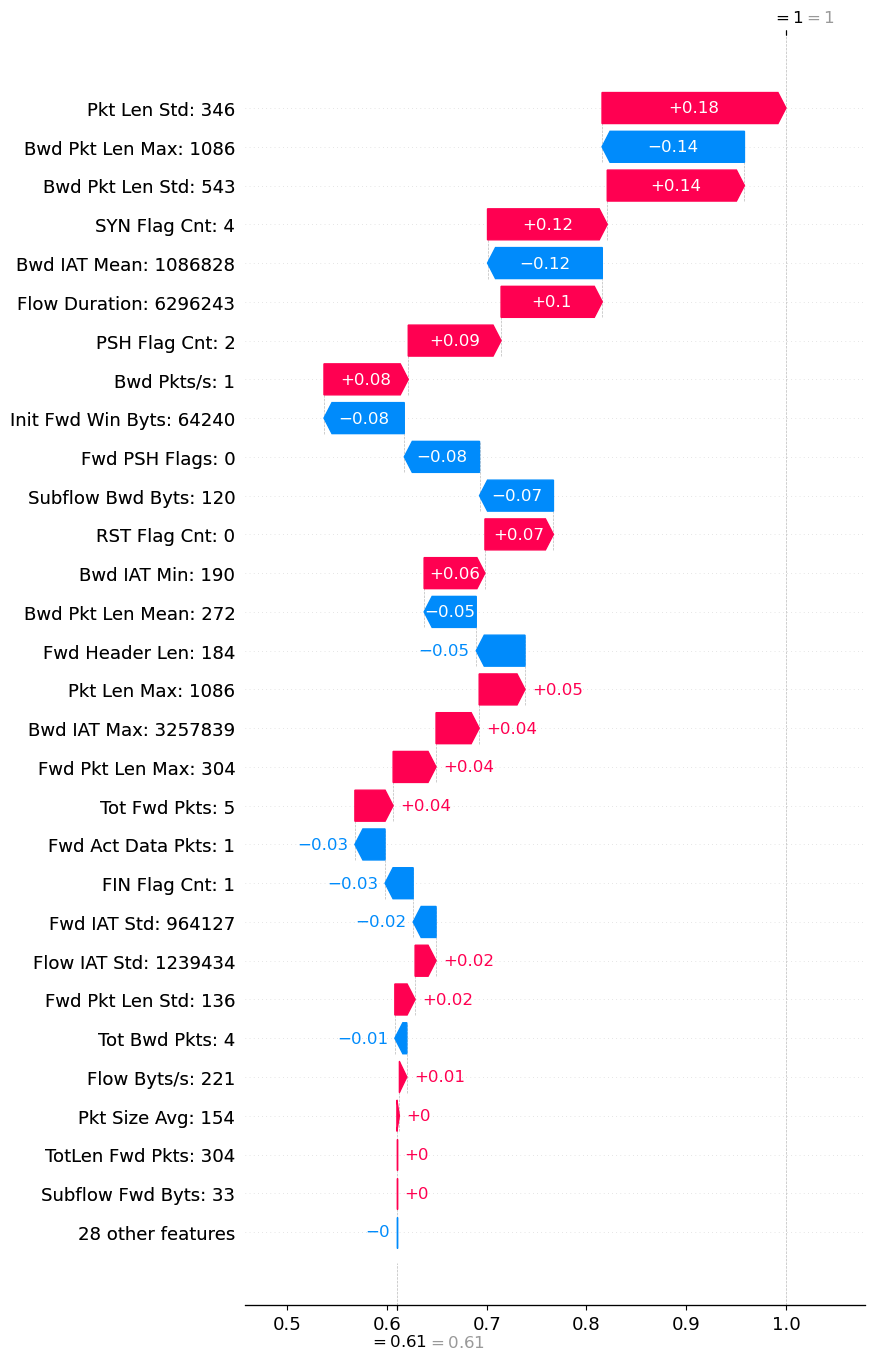

In [30]:
feature = [a + ": " + str(int(b)) for a,b in zip(features, data1[num].round(0))]

shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[num],feature_names=feature, max_display=30)


Benign


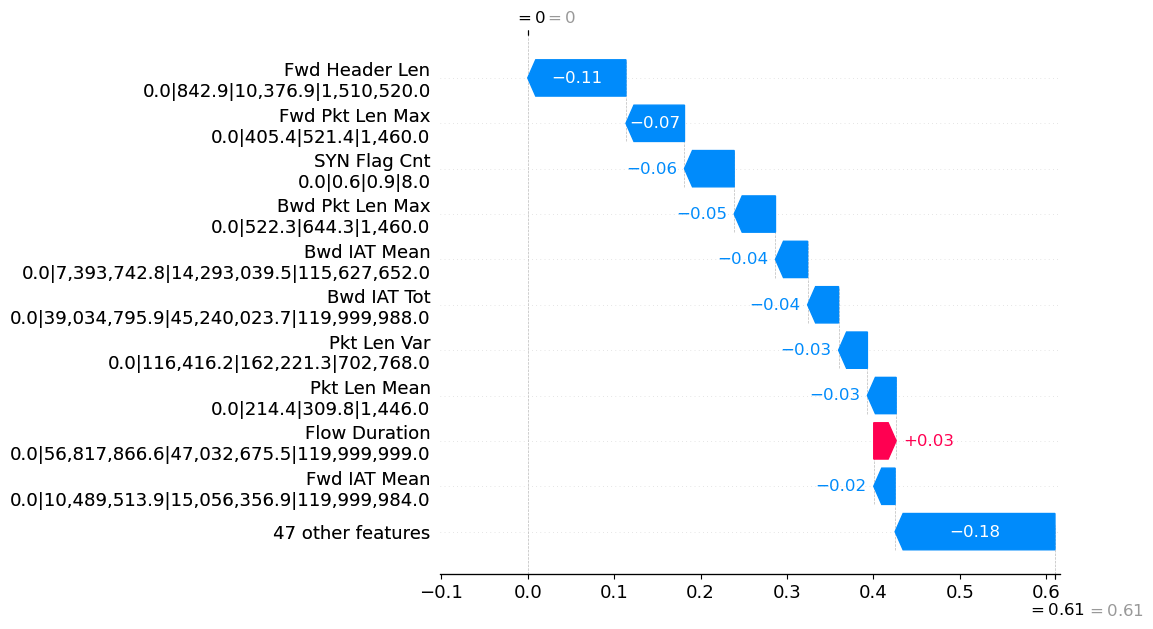

In [31]:
#0-Bening
#1-DoS attacks-GoldenEye
#2-DoS attacks-Hulk
#3-'DoS attacks-SlowHTTPTest
#4-'DoS attacks-Slowloris
#5'FTP-BruteForce,
#6'SSH-Bruteforce
nuevo_shap=shap_values[0]*0
nuevo_data = data1[0]*0
nuevo_min=data1[0]
nuevo_max=nuevo_data
nuevo_std=nuevo_data

acum=0
ata=0
margen=0.2

if ata==1:
    clase ='Evil'
else:
    clase ='Benign'

for i in range(size):
    suma=shap_values[i].sum()+explainer.expected_value
    if  (suma > (ata-abs(margen)))  and (suma < (ata+abs(margen))):
        nuevo_shap=nuevo_shap+shap_values[i]
        nuevo_data=nuevo_data+data1[i]
        nuevo_min =np.minimum(nuevo_min,data1[i])
        nuevo_max =np.maximum(nuevo_max,data1[i])
        acum=acum+1
nuevo_shap=nuevo_shap/acum
nuevo_data=nuevo_data/acum
#Calculo del STD
for i in range(size):
    suma=shap_values[i].sum()+explainer.expected_value
    if  (suma > (ata-abs(margen)))  and (suma < (ata+abs(margen))):
        
        nuevo_std= nuevo_std+((data1[i]-nuevo_data)**2)
       
nuevo_std = (nuevo_std/acum)**0.5


#print('{0:,}'.format(int(nuevo_max[1])))
#"|" + '{0:,}'.format(int(e)) 
feature = [a + "\n" + '{0:,}'.format(b) +"|" +'{0:,}'.format(c) +"|" +'{0:,}'.format(d)+"|" +'{0:,}'.format(e)
           for a,b,c,d,e in zip(features,dataset.loc[dataset['Label'] == clase,features].min().round(1),
                                dataset.loc[dataset['Label'] == clase,features].mean().round(1),
                                dataset.loc[dataset['Label'] == clase,features].std().round(1),
                                dataset.loc[dataset['Label'] == clase,features].max().round(1),
                               )]
print(Labels[ata])
shap.plots._waterfall.waterfall_legacy(explainer.expected_value, nuevo_shap,feature_names=feature, max_display=11)

#shap.summary_plot(shap_values, data1, plot_type="bar", class_names= Labels1, feature_names = features)
#Revisar que significa el explainer expecteed value

In [32]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn import tree


In [93]:
#clf = tree.DecisionTreeClassifier(random_state=0)
import time

inicio = time.time()


n_estimators=200
clf = RandomForestClassifier(random_state=0,n_estimators=n_estimators,max_depth=5)
#    max_features
clf = clf.fit(X_trainArr,Y_train)
#Con 3    0.92
#COn 04   0.96097880

fin = time.time()
tiempo_random = fin-inicio
print(tiempo_random)

93.67843222618103


In [94]:
Y_predtree=clf.predict(X_trainArr)
LabelsArr = np.array(Labels)
y_testree1 = []
for i in range(0, Y_train.size):
        if Y_train[i] == 1:
            y_testree1.append("Evil")
        else:
            y_testree1.append("Benign")
y_predtree1 = []
for i in range(0, Y_predtree.size):
        if Y_predtree[i] == 1:
            y_predtree1.append("Evil")
        else:
            y_predtree1.append("Benign")

In [95]:
print(classification_report(y_testree1, y_predtree1, digits=8, zero_division= "warn"))
accuracy_modelo=accuracy_score(Y_train, Y_predtree)

              precision    recall  f1-score   support

      Benign  0.99817452 0.98345490 0.99076004    120096
        Evil  0.98725988 0.99859916 0.99289715    154193

    accuracy                      0.99196833    274289
   macro avg  0.99271720 0.99102703 0.99182859    274289
weighted avg  0.99203880 0.99196833 0.99196143    274289



<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

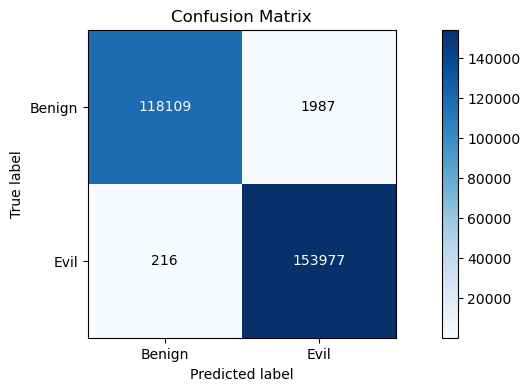

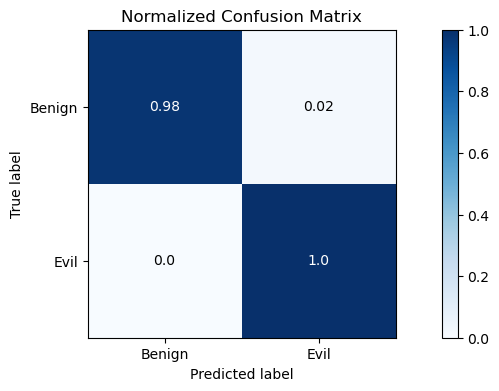

In [96]:
skplt.metrics.plot_confusion_matrix(y_testree1, y_predtree1)
skplt.metrics.plot_confusion_matrix(y_testree1, y_predtree1, normalize= True)

In [97]:
Y_predtree=clf.predict(X_testArr)
LabelsArr = np.array(Labels)
y_testree1 = []
for i in range(0, Y_test.size):
        if Y_test[i] == 1:
            y_testree1.append("Evil")
        else:
            y_testree1.append("Benign")
y_predtree1 = []
for i in range(0, Y_predtree.size):
        if Y_predtree[i] == 1:
            y_predtree1.append("Evil")
        else:
            y_predtree1.append("Benign")

In [98]:
print(classification_report(y_testree1, y_predtree1, digits=8, zero_division= "warn"))


              precision    recall  f1-score   support

      Benign  0.99440829 0.97669728 0.98547322     32228
        Evil  0.97876552 0.99491277 0.98677309     34793

    accuracy                      0.98615359     67021
   macro avg  0.98658690 0.98580503 0.98612315     67021
weighted avg  0.98628757 0.98615359 0.98614803     67021



<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

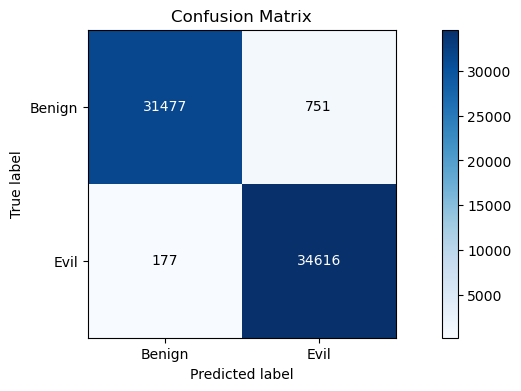

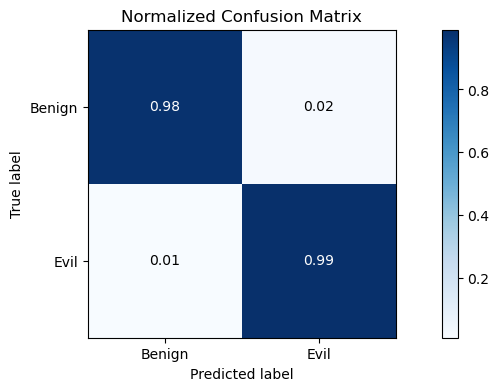

In [99]:
skplt.metrics.plot_confusion_matrix(y_testree1, y_predtree1)
skplt.metrics.plot_confusion_matrix(y_testree1, y_predtree1, normalize= True)

In [100]:
#plt.plot_tree(clf, feature_names=features,  class_names=Labels,filled=True)
from matplotlib.backends.backend_pdf import PdfPages
accuracy_ant=0
accuracy_med=0
accuracy_pon=0
accuracy_pon_ant=0
best=0
dist_ant=1000
from tqdm import tqdm
#tqdm(range(n_estimators))
import time
inicio=time.time()

for i in range(n_estimators):
    aux_clf = clf.estimators_[i]
    y_pred_train=aux_clf.predict(X_trainArr)
    y_pred_test=aux_clf.predict(X_testArr)
    accuracy=accuracy_score(Y_test, y_pred_test)
    
    accuracy_train=accuracy_score(Y_train, y_pred_train)
    accuracy_pon = accuracy_train*accuracy
    
    #dist=abs(accuracy_modelo-accuracy)
    
    if accuracy_pon > accuracy_pon_ant:
        pon=i
        accuracy_pon_ant=accuracy_pon
        accuracy_pon_train = accuracy_train
        accuracy_pon_test = accuracy

fin = time.time()
tiempo_extra = fin-inicio
print(tiempo_extra)

    #if accuracy > accuracy_ant:
     #   best = i
      #  accuracy_ant=accuracy
        
    #if dist < dist_ant:
     #   med = i
      #  accuracy_med=accuracy
       # dist_ant = dist


#fig = plt.figure(figsize=(45,10))
#_ = tree.plot_tree(clf.estimators_[best], feature_names=features,  class_names=Labels,filled=True)

#fig2 = plt.figure(figsize=(45,15))
#_ = tree.plot_tree(clf.estimators_[med], feature_names=features,  class_names=Labels,filled=True)



23.6404869556427


In [101]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(clf.estimators_[pon], out_file=None, feature_names=features,  
                                class_names=Labels,
                                filled=True)
#graph = graphviz.Source(dot_data, format="png") 
#graph
#graph.render("decision_tree_graphivz")

In [102]:
#fig3 = plt.figure(figsize=(25,20))
#_ = tree.plot_tree(clf.estimators_[pon], feature_names=features,  class_names=Labels,filled=True)

#fig.suptitle('Arbol numero: '+str(best)+' Precision: '+ str(round(accuracy_ant,3)))
#fig.savefig("decistion_tree.pdf")

#fig2.suptitle('Arbol numero: '+str(med)+' Precision: '+ str(round(accuracy_med,3)))
#fig2.savefig("decistion_tree_mean.pdf")

#fig3.suptitle('Arbol numero: '+str(pon)+' Precision test: '+ str(round(accuracy_pon_test,3)) +' Precision entrenamiento: '+ str(round(accuracy_pon_train,3)))
#fig3.savefig("decistion_tree_pon4Ramas.png")

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

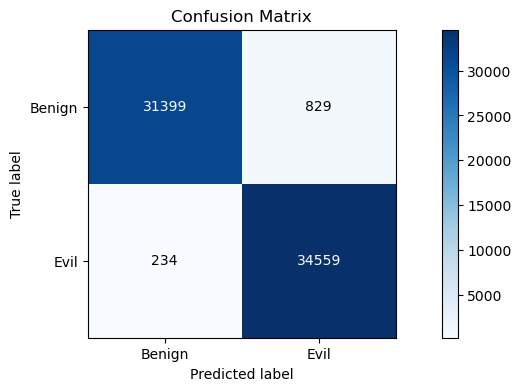

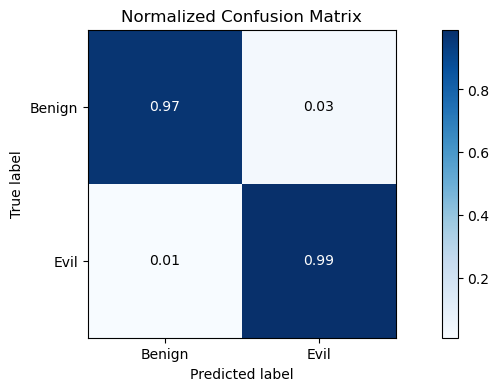

In [103]:
arbol_pon=clf.estimators_[pon]
Y_predtree=arbol_pon.predict(X_testArr)
LabelsArr = np.array(Labels)
y_testree1 = []
for i in range(0, Y_test.size):
        if Y_test[i] == 1:
            y_testree1.append("Evil")
        else:
            y_testree1.append("Benign")
y_predtree1 = []
for i in range(0, Y_predtree.size):
        if Y_predtree[i] == 1:
            y_predtree1.append("Evil")
        else:
            y_predtree1.append("Benign")
            
skplt.metrics.plot_confusion_matrix(y_testree1, y_predtree1)
skplt.metrics.plot_confusion_matrix(y_testree1, y_predtree1, normalize= True)


In [104]:
dataset0 = pd.read_csv('Train.csv', encoding = "ISO-8859-1") # lectura de datos
dataset01 = pd.read_csv('Test.csv', encoding = "ISO-8859-1") # lectura de datos

dataset0.replace([np.inf, -np.inf], -1, inplace=True) 
dataset0.replace([np.nan, -np.nan], -1, inplace=True)

dataset01.replace([np.inf, -np.inf], -1, inplace=True) 
dataset01.replace([np.nan, -np.nan], -1, inplace=True)

dataset0 = dataset0.drop(dataset0[dataset0['Dst Port']=='Dst Port'].index)
dataset01 = dataset01.drop(dataset01[dataset01['Dst Port']=='Dst Port'].index)

#Eliminamos las columnas innecesarias

dataset0 = dataset0.drop(['Flow ID', 'Src IP', 'Src Port', 'Dst IP','Unnamed: 0','Dst Port','Fwd Seg Size Min',
                       'Idle Min','Idle Mean','Idle Std','Idle Max'], axis=1)
dataset01 = dataset01.drop(['Flow ID', 'Src IP', 'Src Port', 'Dst IP','Unnamed: 0','Dst Port','Fwd Seg Size Min',
                          'Idle Min','Idle Mean','Idle Std','Idle Max'], axis=1)
#Quitamos direcciones IP dest y src para no introducir sesgos, lo mismo con los puertos
#Quitar el puerto de destino es una modificación con respecto al trabajo original
#Eliminamos la columna de timestamp para no tener sesgo
dataset01 = dataset01.drop(['Timestamp'], axis=1)
dataset0 = dataset0.drop(['Timestamp'], axis=1)

dataset0.loc[(dataset0.Label != 'Benign'),'Label']='Evil'
dataset01.loc[(dataset01.Label != 'Benign'),'Label']='Evil'

X_train0=dataset0.iloc[:, 0:72] #Luego obtenemos las características del flujo
X_test0=dataset01.iloc[:, 0:72]



for col in X_train0.columns:
    if X_train0[col].var() == 0:
        print(col)
        X_train0=X_train0.drop(col, axis =1)
        X_test0=X_test0.drop(col, axis =1)
        
X_trainArr0=X_train0.to_numpy()
X_testArr0=X_test0.to_numpy()

X_tiempo=np.concatenate((X_trainArr0, X_testArr0), axis=0)

print(X_tiempo.shape)
#model
#clf
#arbol_pon

Bwd PSH Flags
Fwd URG Flags
Bwd URG Flags
URG Flag Cnt
CWE Flag Count
ECE Flag Cnt
Fwd Byts/b Avg
Fwd Pkts/b Avg
Fwd Blk Rate Avg
Bwd Byts/b Avg
Subflow Bwd Pkts
Active Mean
Active Std
Active Max
Active Min
(532148, 57)


In [105]:
#    max_features
import time
inicio = time.time()
Y_predtree=arbol_pon.predict(X_tiempo)
fin = time.time()

print(fin-inicio)
print(tiempo_neurona,tiempo_random,tiempo_extra) 

0.12267231941223145
181.1179220676422 93.67843222618103 23.6404869556427
